In [47]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\subho\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [3]:
data = pd.read_csv(required_url)

In [4]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### For this exercise we are removing categorical data and User ID

In [5]:
data = data.iloc[:,2:5]

In [6]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Purchased", axis = 1),data["Purchased"], test_size = 0.3, 
                                                    random_state = 0)

## Why do we need to use random state in train_test_ssplit?

random_state is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [21]:
Y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

## StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
# The for mula which we are using over hear is that of z Normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [25]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

### Since the datasets returned after scaling are numpy arrays so we have to convert them into Pandas dataframes

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [32]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [38]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Visual representation of the effect of scaling

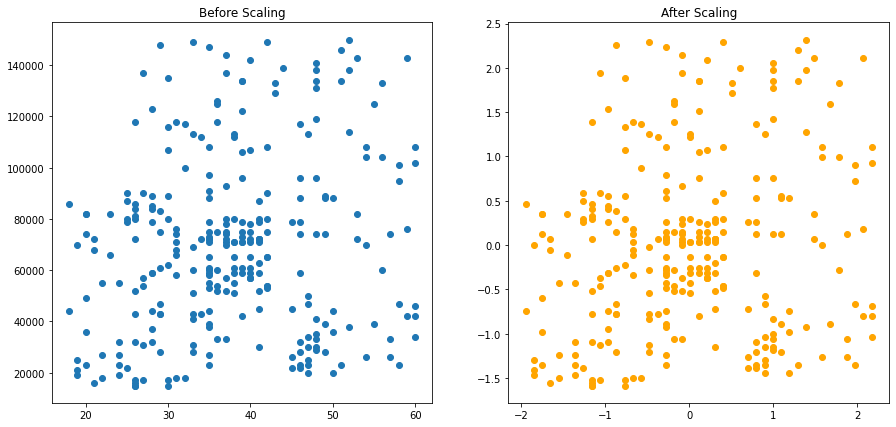

In [43]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (15,7))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color = "orange")
ax2.set_title("After Scaling")
plt.show()

## Conclusion from the above visualization

Scaling only shrinks the data but the original shape of the data remains the same

## In order to visualize the benefit of scaling we use kernal density estimation

[]

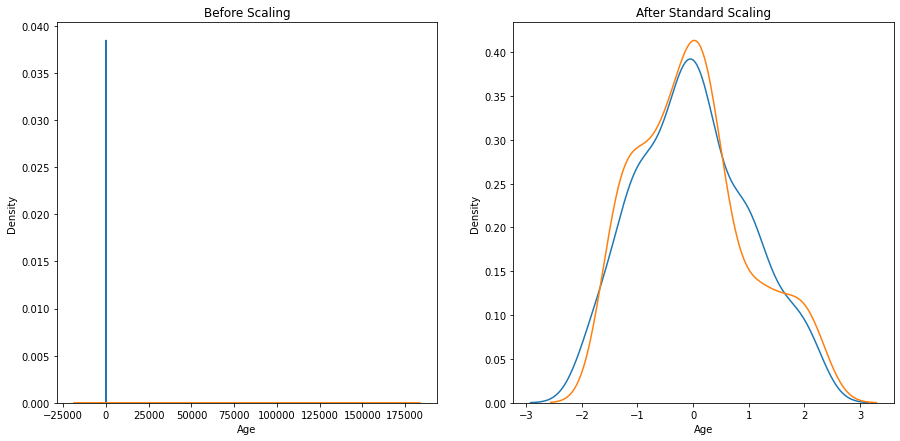

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (15,7))

# before scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax = ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax = ax1)

# after scaling

ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax = ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax = ax2)

plt.plot()

### From th above visualization we can understand that after scaling both the features are comparable to each other and as a result of which we can do many operations on it

## Now lets check whether the shape of the distribution changes upon scaling

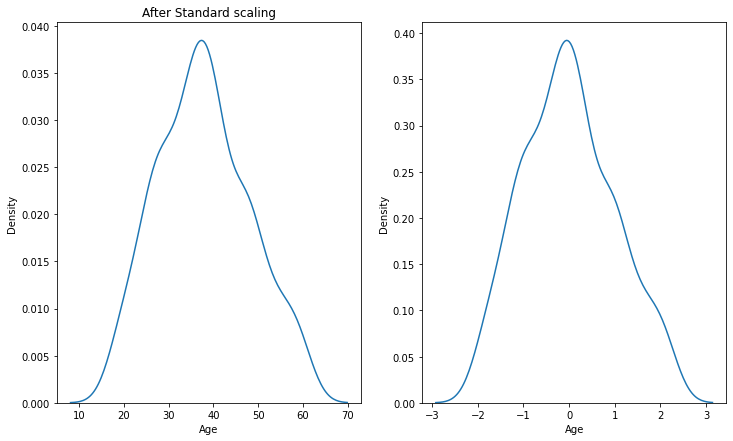

In [56]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,7))

# Before Scaling

ax1.set_title("Before scaling")
sns.kdeplot(X_train["Age"], ax = ax1)

#After Scaling

ax1.set_title("After Standard scaling")
sns.kdeplot(X_train_scaled["Age"], ax = ax2)

plt.show()

### From the above visualization we can conclude that shape of visualization remains same upon scaling

# Section 2

## Lets understand the effect of outliers on Standard Scaling

In [57]:
modified_data = data

In [60]:
np.round(modified_data.describe(),1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


### Add some outliers to the above dataset

In [83]:
dict = {"Age": [2,105,100],"EstimatedSalary":[1000,00000,500],"Purchased":[0,1,0]}

In [84]:
new = pd.DataFrame(dict)

In [85]:
new

,Age,EstimatedSalary,Purchased
0,2,1000,0
1,105,100000,1
2,100,500,0


In [86]:
modified_data = modified_data.append(new)

In [87]:
modified_data.shape

(409, 3)

### Train Test Split

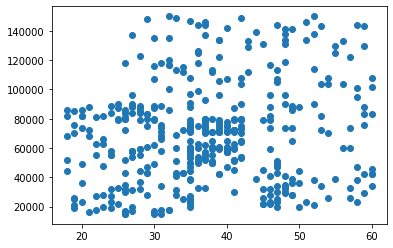

In [88]:
plt.scatter(data["Age"], data["EstimatedSalary"])

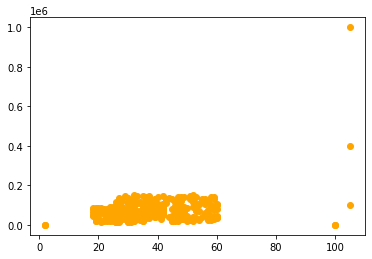

In [89]:
plt.scatter(modified_data["Age"], modified_data["EstimatedSalary"], color = "orange")

In [105]:
x_train

,Age,EstimatedSalary
264,48,90000
218,46,96000
271,59,76000
235,46,79000
106,26,35000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


## Standardization of data

In [109]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(x_train)
x_train_transformed = scaler1.transform(x_train)
x_test_transformed = scaler1.transform(x_test)
x_train_transformed

array([[ 6.55501034e-01,  2.57930635e-01],
       [ 5.10518514e-01,  3.48184236e-01],
       [ 1.45290489e+00,  4.73388987e-02],
       [ 5.10518514e-01,  9.24656993e-02],
       [-9.39306686e-01, -5.69394043e-01],
       [-1.41902826e-01,  3.22966318e-02],
       [-5.04359126e-01,  7.09198641e-01],
       [-2.14394086e-01,  1.07021305e+00],
       [ 4.38027254e-01, -6.14520843e-01],
       [ 5.83009774e-01, -3.28717773e-01],
       [-6.94115660e-02, -1.78295104e-01],
       [ 3.07969405e-03, -4.64098175e-01],
       [-8.66815426e-01,  2.42888368e-01],
       [ 7.55709541e-02, -2.78724357e-02],
       [ 7.55709541e-02,  3.22966318e-02],
       [-7.94324166e-01, -2.68548705e-01],
       [-2.86885346e-01, -7.19816711e-01],
       [ 1.52539615e+00, -4.03929107e-01],
       [-2.86885346e-01, -3.43760040e-01],
       [ 3.07969405e-03,  3.48184236e-01],
       [ 5.83009774e-01, -3.58802307e-01],
       [ 4.78750286e+00,  1.39463935e+01],
       [-1.41902826e-01, -2.98633239e-01],
       [-1.

In [110]:
x_test_transformed

array([[-6.94115660e-02, -2.08379638e-01],
       [ 5.10518514e-01,  6.64071840e-01],
       [ 6.55501034e-01,  1.72543649e-02],
       [ 2.20553474e-01,  2.57930635e-01],
       [-5.04359126e-01,  1.97761567e-01],
       [ 8.00483554e-01, -7.95028046e-01],
       [ 3.07969405e-03, -4.64098175e-01],
       [-1.41902826e-01,  9.24656993e-02],
       [-8.66815426e-01, -7.95028046e-01],
       [-6.94115660e-02,  5.88860506e-01],
       [-1.41902826e-01, -2.38464172e-01],
       [-1.08428921e+00,  2.42888368e-01],
       [-5.04359126e-01,  6.64071840e-01],
       [ 6.55501034e-01,  6.94156374e-01],
       [-1.37425425e+00,  1.97761567e-01],
       [-1.41902826e-01, -2.68548705e-01],
       [-5.04359126e-01,  9.34832644e-01],
       [ 6.55501034e-01,  9.19790377e-01],
       [ 1.48062214e-01, -3.13675506e-01],
       [ 4.38027254e-01,  9.24656993e-02],
       [-1.51923677e+00, -7.29992363e-02],
       [-7.94324166e-01,  2.12803834e-01],
       [-3.59376606e-01, -7.19816711e-01],
       [ 2.

## Convert the numpy arrays into dataframe

In [111]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns = x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns = x_test.columns)

In [112]:
x_train_transformed

,Age,EstimatedSalary
0,0.655501,0.257931
1,0.510519,0.348184
2,1.452905,0.047339
3,0.510519,0.092466
4,-0.939307,-0.569394
...,...,...
301,0.655501,-0.644605
302,-0.721833,-0.449056
303,-0.214394,-0.313676
304,-0.866815,-0.283591


In [114]:
x_test_transformed

,Age,EstimatedSalary
0,-0.069412,-0.208380
1,0.510519,0.664072
2,0.655501,0.017254
3,0.220553,0.257931
4,-0.504359,0.197762
...,...,...
98,1.380414,-0.524267
99,-1.156780,-0.373845
100,-1.011798,-0.599479
101,-0.649342,0.092466


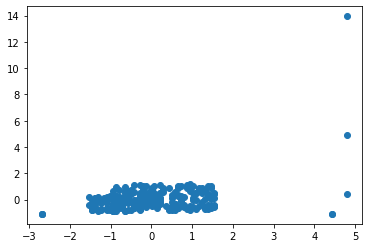

In [115]:
plt.scatter(x_train_transformed["Age"],x_train_transformed["EstimatedSalary"])

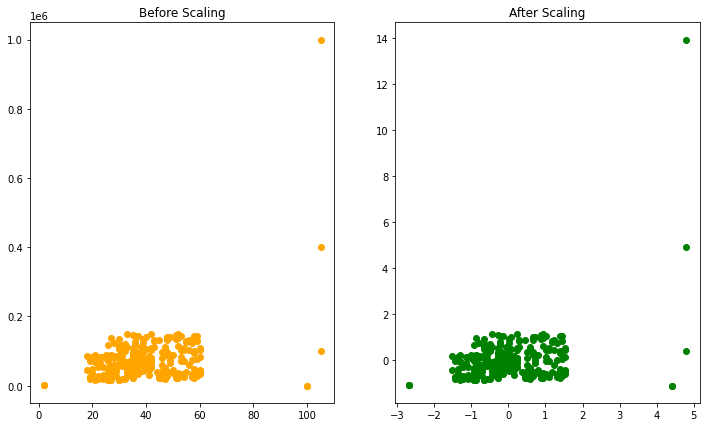

In [118]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,7))

ax1.set_title("Before Scaling")
ax1.scatter(x_train["Age"],x_train["EstimatedSalary"], color = "orange")

ax2.set_title("After Scaling")
ax2.scatter(x_train_transformed["Age"],x_train_transformed["EstimatedSalary"], color = "green")
plt.show()

## Frome the above visualization we can conclude that scaling has no effect of outliers, so we have to deal with the outliers separately for our model to give better prediction